In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [2]:
from google.colab import files

uploaded = files.upload()

# Load file yang diupload
df = pd.read_excel(next(iter(uploaded)))  # otomatis ambil nama file pertama
df.columns = ['Hours', 'Scores']
df.head()


Saving student_scores.xlsx to student_scores (1).xlsx


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Informasi awal
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


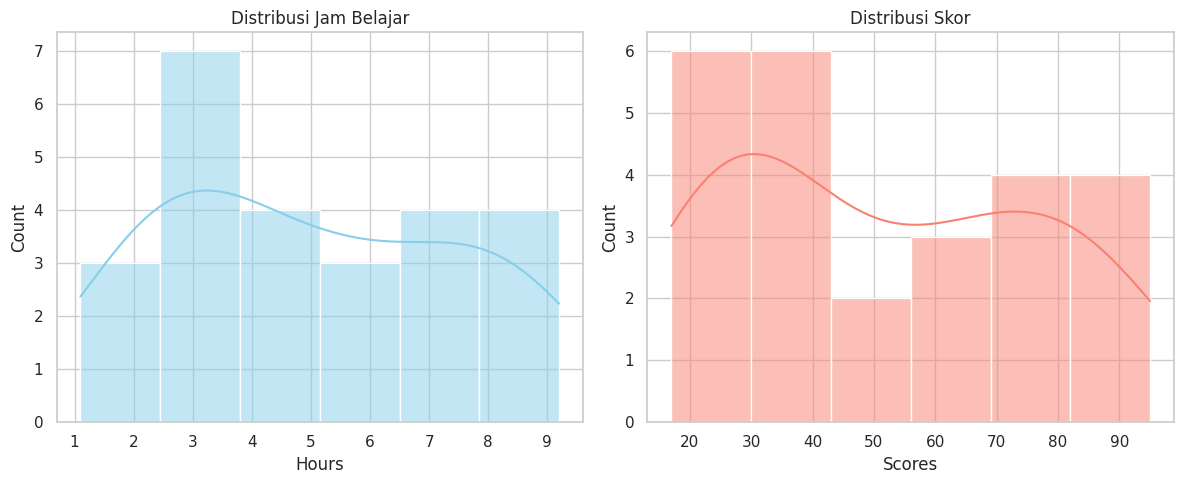

In [4]:
# Visualisasi distribusi data
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Hours'], kde=True, color='skyblue')
plt.title('Distribusi Jam Belajar')

plt.subplot(1,2,2)
sns.histplot(df['Scores'], kde=True, color='salmon')
plt.title('Distribusi Skor')

plt.tight_layout()
plt.show()


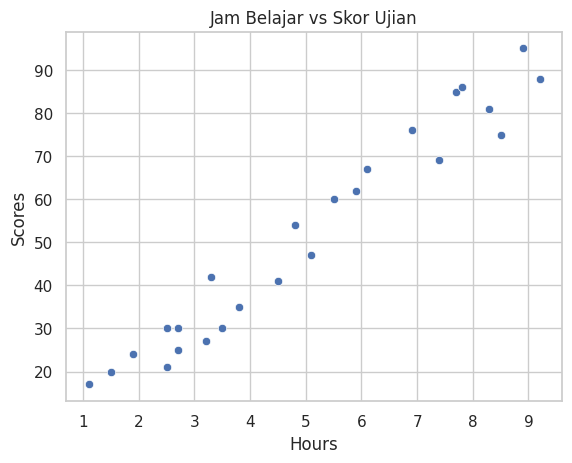

Korelasi Pearson:
            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
# Korelasi antara jam belajar dan skor
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Jam Belajar vs Skor Ujian')
plt.show()

print("Korelasi Pearson:\n", df.corr())


**FEATURE** **ENGINEERING**

In [6]:
print("Jumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


In [7]:
print("Missing Values per Kolom:\n", df.isnull().sum())


Missing Values per Kolom:
 Hours     0
Scores    0
dtype: int64


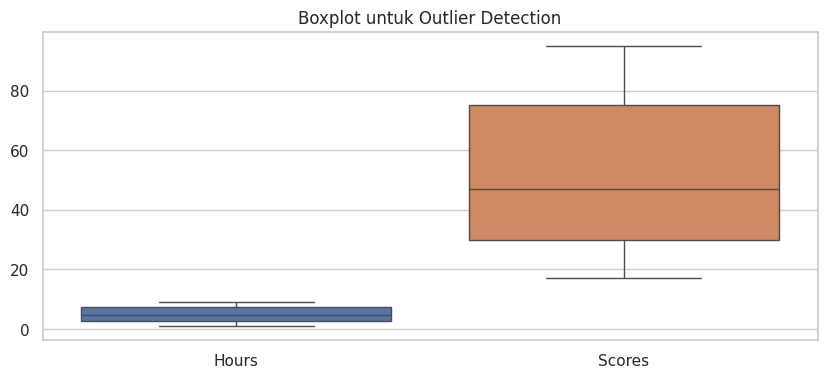

In [8]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df)
plt.title("Boxplot untuk Outlier Detection")
plt.show()


**Modeling: Linear Regression & Decision Tree Regressor**

In [10]:
# Split data
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat 2 model
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)

# Training
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Prediksi
lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)


EVALUASI **MODEL**

In [11]:
def evaluate_model(name, y_true, y_pred):
    print(f"📌 Evaluasi Model: {name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-" * 40)

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Decision Tree Regressor", y_test, dt_preds)


📌 Evaluasi Model: Linear Regression
MAE : 3.9207511902099244
MSE : 18.943211722315272
RMSE: 4.352380006653288
R2 Score: 0.9678055545167994
----------------------------------------
📌 Evaluasi Model: Decision Tree Regressor
MAE : 5.4
MSE : 31.7
RMSE: 5.630275304103699
R2 Score: 0.9461250849762066
----------------------------------------


VISUALISASI HASIL PREDIKSI

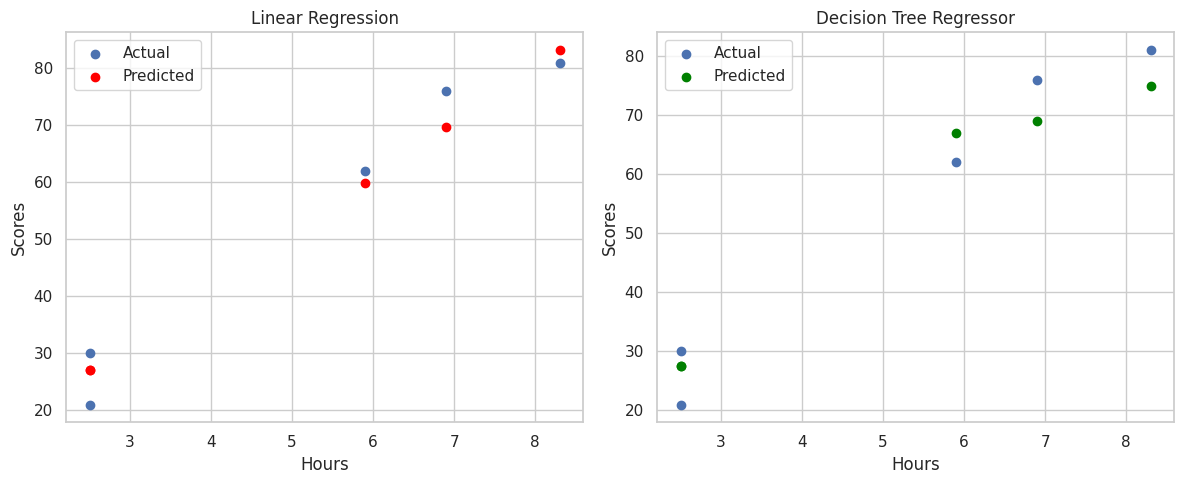

In [12]:
# Plot prediksi vs aktual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, lr_preds, color='red', label="Predicted")
plt.title("Linear Regression")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, dt_preds, color='green', label="Predicted")
plt.title("Decision Tree Regressor")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()

plt.tight_layout()
plt.show()
